# 02 - Creazione indice

In [1]:
import pandas as pd
import numpy as np
from numpy import log
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from requests import get
from io import StringIO
from sklearn import preprocessing

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM/export?format=csv&id=1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM&gid=2001946666'
r = get(url)
data = r.content.decode('utf-8')

df = pd.read_csv(StringIO(data))
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_2017_CL,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,4,3,124,64,42,23,13,7,7.96,180000000
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,6,3,369,219,135,53,32,23,8.41,180000000
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,6,2,657,573,229,129,106,28,8.71,180000000
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,10,5,328,135,77,34,16,6,7.61,150000000
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,7,2,317,182,43,16,13,3,7.32,150000000


In [3]:
df.columns

Index(['nome', 'nome_chiave', 'eta', 'ruolo', 'ruolo_dettaglio', 'squadra',
       'nazione_squadra', 'nazione_giocatore', 'instagram_followers',
       'facebook_followers', 'twitter_followers', 'insta_likes_avg',
       'google_hits', 'google_hits_1', 'wiki_visual', 'insta_hashtag',
       'GER_kicker', 'GER_bild_G', 'GER_eurosport_G', 'ITA_corriere',
       'ITA_sky_G', 'ITA_gazzetta_G', 'ENG_thesun', 'ENG_sky_G',
       'ENG_guardian_G', 'SPA_marca', 'SPA_as_G', 'SPA_mundodep_G',
       'FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G',
       'FRA_le10sport_G', 'INT_eurosport_G', 'INT_espn_G', 'INT_bein_G',
       'pres_2018_tot', 'goal_2018_tot', 'assist_2018_tot', 'pres_2018_CL',
       'goal_2018_CL', 'assist_2018_CL', 'pres_2017_tot', 'goal_2017_tot',
       'assist_2017_tot', 'pres_2017_CL', 'goal_2017_CL', 'assist_2017_CL',
       'pres_tot', 'goal_tot', 'assist_tot', 'pres_tot_CL', 'goal_tot_CL',
       'assist_tot_CL', 'whoscored1819', 'valore'],
      dtype='obje

In [4]:
def Normalize(df):
    n = df.shape[1]
    c = df.columns
    o = pd.DataFrame(columns=c)
    for i in range(n):
        x = df.iloc[:, i].values
        z = (x-x.min())/(x.max()-x.min())
        o[c[i]] = z
    return o

## Correzione missing

## Instagram

In [5]:
df[df.instagram_followers.isnull()]

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_2017_CL,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore
31,Sergio Busquets,Busquets,30,Centrocampista,Mediano,FC Barcellona,Spagna,Spagna,NaN,3113955.0,...,0,0,507,13,34,100,4,6,7.08,80000000
116,Rodrigo Hernández,Rodrigo Hernandez,22,Centrocampista,Mediano,Atlético de Madrid,Spagna,Spagna,NaN,NaN,...,0,0,149,6,6,6,0,0,7.35,40000000
220,Danny Rose,Danny Rose,28,Difensore,Terzino sinistro,Tottenham Hotspur,Inghilterra,Inghilterra,NaN,NaN,...,0,0,233,11,27,8,0,1,6.70,30000000
260,Abdou Diallo,Diallo,22,Difensore,Difensore centrale,Borussia Dortmund,Germania,Francia,NaN,NaN,...,0,0,109,7,2,6,0,0,6.90,25000000


In [6]:
df = df[-df.instagram_followers.isnull()]
df = df[df['nome']!='Paulinho']
df = df[df['nazione_squadra'] != 'Cina']
df = df[df['nazione_squadra'] != 'Olanda']
df = df[df['nazione_squadra'] != 'Portogallo']
df.reset_index(inplace=True,drop=True)

In [7]:
df.shape

(280, 55)

In [8]:
cols=['instagram_followers','insta_likes_avg', 'insta_hashtag']

X1 = Normalize(log(df[cols]))
X1.head()

,instagram_followers,insta_likes_avg,insta_hashtag
0,0.799026,0.845133,0.725603
1,0.964472,0.864989,0.961382
2,0.960350,0.969675,1.000000
3,0.787635,0.836041,0.820226
4,0.669067,0.577733,0.615361


In [9]:
X1.corr()

,instagram_followers,insta_likes_avg,insta_hashtag
instagram_followers,1.000000,0.906701,0.878319
insta_likes_avg,0.906701,1.000000,0.836728
insta_hashtag,0.878319,0.836728,1.000000


In [10]:
df['Instagram'] = X1.mean(axis=1)

In [11]:
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore,Instagram
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,3,124,64,42,23,13,7,7.96,180000000,0.789920
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,3,369,219,135,53,32,23,8.41,180000000,0.930281
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,2,657,573,229,129,106,28,8.71,180000000,0.976675
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,5,328,135,77,34,16,6,7.61,150000000,0.814634
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,2,317,182,43,16,13,3,7.32,150000000,0.620721


## Facebook

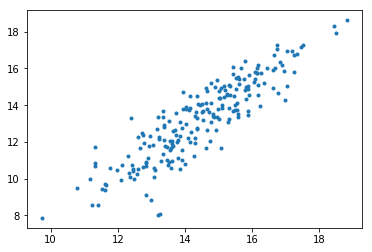

In [12]:
plt.plot(log(df.instagram_followers), log(df.facebook_followers), '.')

In [13]:
X_train = df.loc[-df.facebook_followers.isnull(),['instagram_followers','facebook_followers']]
y_train = log(X_train.facebook_followers)
X_train = pd.DataFrame(log(X_train['instagram_followers']))

X_test = log(df.loc[df.facebook_followers.isnull(),['instagram_followers']])

mod_lm = LinearRegression()
mod_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
ypred = mod_lm.predict(X_test).round(2)

In [15]:
df['Facebook'] = log(df.facebook_followers)
df.loc[df.Facebook.isnull(),'Facebook'] = ypred
df['Facebook'] = (df.Facebook-df.Facebook.min())/(df.Facebook.max()-df.Facebook.min())
df.head(5)

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore,Instagram,Facebook
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,124,64,42,23,13,7,7.96,180000000,0.789920,0.598905
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,369,219,135,53,32,23,8.41,180000000,0.930281,0.934688
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,657,573,229,129,106,28,8.71,180000000,0.976675,0.971202
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,328,135,77,34,16,6,7.61,150000000,0.814634,0.776020
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,317,182,43,16,13,3,7.32,150000000,0.620721,0.600085


# Twitter

In [16]:
X_train = df.loc[-df.twitter_followers.isnull(),['instagram_followers','Facebook','twitter_followers']]
y_train = log(X_train.twitter_followers)
X_train = X_train[['instagram_followers','Facebook']]
X_train.instagram_followers = log(X_train.instagram_followers)

X_test = df.loc[df.twitter_followers.isnull(),['instagram_followers','Facebook']]
X_test.instagram_followers = log(X_test.instagram_followers)

mod_lm = LinearRegression()
mod_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
ypredtwitter = mod_lm.predict(X_test)

In [18]:
df['Twitter'] = log(df.twitter_followers)
df.loc[df.Twitter.isnull(),'Twitter'] = ypredtwitter
df['Twitter'] = (df.Twitter-df.Twitter.min())/(df.Twitter.max()-df.Twitter.min())
df.head(5)

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore,Instagram,Facebook,Twitter
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,64,42,23,13,7,7.96,180000000,0.789920,0.598905,0.662100
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,219,135,53,32,23,8.41,180000000,0.930281,0.934688,0.942762
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,573,229,129,106,28,8.71,180000000,0.976675,0.971202,0.861400
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,135,77,34,16,6,7.61,150000000,0.814634,0.776020,0.777298
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,182,43,16,13,3,7.32,150000000,0.620721,0.600085,0.670324


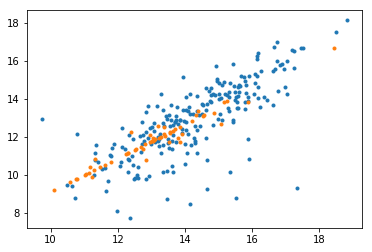

In [19]:
plt.plot(log(df.instagram_followers), log(df.twitter_followers), '.')
plt.plot(log(df.instagram_followers[df.twitter_followers.isnull()]), ypredtwitter, '.')

# DIMENSIONE SOCIAL (S)

In [20]:
df['SOCIAL'] = (df.Instagram+df.Facebook+df.Twitter)/3

In [21]:
df.head(10)

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore,Instagram,Facebook,Twitter,SOCIAL
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,42,23,13,7,7.96,180000000,0.789920,0.598905,0.662100,0.683642
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,135,53,32,23,8.41,180000000,0.930281,0.934688,0.942762,0.935910
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,229,129,106,28,8.71,180000000,0.976675,0.971202,0.861400,0.936426
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,77,34,16,6,7.61,150000000,0.814634,0.776020,0.777298,0.789317
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,43,16,13,3,7.32,150000000,0.620721,0.600085,0.670324,0.630377
5,Antoine Griezmann,Griezmann,27,Attaccante,Punta centrale,Atlético de Madrid,Spagna,Francia,22858764.0,7657796.0,...,65,52,21,7,7.24,150000000,0.769369,0.742211,0.753620,0.755067
6,Kevin De Bruyne,De Bruyne,27,Centrocampista,Trequartista,Manchester City,Inghilterra,Belgio,7413980.0,3311435.0,...,140,32,5,6,5.93,150000000,0.646329,0.664267,0.631251,0.647282
7,Philippe Coutinho,Coutinho,26,Centrocampista,Trequartista,FC Barcellona,Spagna,Brasile,19320944.0,2349602.0,...,62,25,6,6,7.17,150000000,0.780033,0.632364,0.642359,0.684919
8,Eden Hazard,Hazard,27,Attaccante,Ala sinistra,Chelsea FC,Inghilterra,Belgio,17814105.0,9276779.0,...,137,44,8,13,7.91,150000000,0.739924,0.760043,0.753172,0.751046
9,Paulo Dybala,Dybala,25,Attaccante,Seconda punta,Juventus FC,Italia,Argentina,25153030.0,3449025.0,...,43,31,11,0,7.12,110000000,0.802710,0.668052,0.626255,0.699006


# DIMENSIONE MEDIA

In [22]:
df.columns

Index(['nome', 'nome_chiave', 'eta', 'ruolo', 'ruolo_dettaglio', 'squadra',
       'nazione_squadra', 'nazione_giocatore', 'instagram_followers',
       'facebook_followers', 'twitter_followers', 'insta_likes_avg',
       'google_hits', 'google_hits_1', 'wiki_visual', 'insta_hashtag',
       'GER_kicker', 'GER_bild_G', 'GER_eurosport_G', 'ITA_corriere',
       'ITA_sky_G', 'ITA_gazzetta_G', 'ENG_thesun', 'ENG_sky_G',
       'ENG_guardian_G', 'SPA_marca', 'SPA_as_G', 'SPA_mundodep_G',
       'FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G',
       'FRA_le10sport_G', 'INT_eurosport_G', 'INT_espn_G', 'INT_bein_G',
       'pres_2018_tot', 'goal_2018_tot', 'assist_2018_tot', 'pres_2018_CL',
       'goal_2018_CL', 'assist_2018_CL', 'pres_2017_tot', 'goal_2017_tot',
       'assist_2017_tot', 'pres_2017_CL', 'goal_2017_CL', 'assist_2017_CL',
       'pres_tot', 'goal_tot', 'assist_tot', 'pres_tot_CL', 'goal_tot_CL',
       'assist_tot_CL', 'whoscored1819', 'valore', 'Instagram', 'Face

In [23]:
# Germania

cols1=['GER_bild_G', 'GER_eurosport_G', 'GER_kicker']
X = Normalize(log(df[cols1]))
df['Germania'] = X.mean(axis=1)

# Francia

cols1=['FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G']
X = Normalize(log(df[cols1]))
df['Francia'] = X.mean(axis=1)

# Italia

cols1=['ITA_corriere', 'ITA_sky_G', 'ITA_gazzetta_G']
X = Normalize(log(df[cols1]))
df['Italia'] = X.mean(axis=1)

# Spagna

cols1=['SPA_marca', 'SPA_as_G', 'SPA_mundodep_G']
X = Normalize(log(df[cols1]))
df['Spagna'] = X.mean(axis=1)

# Inghilterra

cols1=['ENG_thesun', 'ENG_guardian_G', 'ENG_sky_G']
X = Normalize(log(df[cols1]))
df['Inghilterra'] = X.mean(axis=1)

# Internazionale

cols1=['INT_eurosport_G', 'INT_espn_G', 'INT_bein_G']
X = Normalize(log(df[cols1]))
df['Internazionale'] = X.mean(axis=1)

In [25]:
df['MEDIA'] = (df.Germania+df.Francia+df.Italia+df.Spagna+df.Inghilterra+df.Internazionale)/6

In [26]:
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,Facebook,Twitter,SOCIAL,Germania,Francia,Italia,Spagna,Inghilterra,Internazionale,MEDIA
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,0.598905,0.662100,0.683642,0.606513,0.963553,0.814640,0.692955,0.751444,0.847766,0.779478
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,0.934688,0.942762,0.935910,0.807065,0.961553,0.888165,0.904050,0.842264,0.952035,0.892522
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,0.971202,0.861400,0.936426,0.782288,0.962024,0.947850,1.000000,0.864732,0.980338,0.922872
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,0.776020,0.777298,0.789317,0.625118,0.754691,0.867892,0.629424,0.866545,0.861211,0.767480
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,0.600085,0.670324,0.630377,0.588854,0.620638,0.638071,0.692033,0.911609,0.786139,0.706224


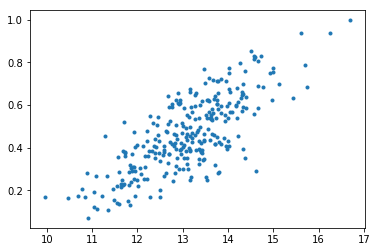

In [45]:
plt.plot(log(df.wiki_visual), df.SOCIAL, '.')

# INTERNET

In [46]:
df['GOOGLE'] = log(df.google_hits_1)
df['GOOGLE'] = (df.GOOGLE-df.GOOGLE.min())/(df.GOOGLE.max()-df.GOOGLE.min())

df['WIKIPEDIA'] = log(df.wiki_visual)
df['WIKIPEDIA'] = (df.WIKIPEDIA-df.WIKIPEDIA.min())/(df.WIKIPEDIA.max()-df.WIKIPEDIA.min())

# Indice di popolarità

In [67]:
df['IPOP'] = (df.SOCIAL*3 + df.MEDIA*6 + df.GOOGLE + df.WIKIPEDIA)/11

In [55]:
c = ['nome','Instagram', 'Facebook', 'Twitter', 'SOCIAL', 'Germania', 'Francia',
       'Italia', 'Spagna', 'Inghilterra', 'Internazionale', 'MEDIA', 'GOOGLE',
       'WIKIPEDIA','IPOP']
df1 = df[c].round(3)
df1.head()

,nome,Instagram,Facebook,Twitter,SOCIAL,Germania,Francia,Italia,Spagna,Inghilterra,Internazionale,MEDIA,GOOGLE,WIKIPEDIA,IPOP
0,Kylian Mbappé,0.790,0.599,0.662,0.684,0.607,0.964,0.815,0.693,0.751,0.848,0.779,0.604,0.859,0.745
1,Neymar,0.930,0.935,0.943,0.936,0.807,0.962,0.888,0.904,0.842,0.952,0.893,0.715,0.842,0.884
2,Leo Messi,0.977,0.971,0.861,0.936,0.782,0.962,0.948,1.000,0.865,0.980,0.923,0.795,0.937,0.916
3,Mohamed Salah,0.815,0.776,0.777,0.789,0.625,0.755,0.868,0.629,0.867,0.861,0.767,0.832,0.852,0.787
4,Harry Kane,0.621,0.600,0.670,0.630,0.589,0.621,0.638,0.692,0.912,0.786,0.706,0.760,0.813,0.700


In [56]:
df.to_csv('data/full_df.csv',index=False)
df1.to_csv('data/indexes.csv',index=False)

## Qualche analisi descrittiva

In [68]:
df_nomi = df[['nome','IPOP']]
df_nomi = df_nomi.sort_values('IPOP', ascending=False)
df_nomi

,nome,IPOP
12,Cristiano Ronaldo,0.942685
2,Leo Messi,0.916198
1,Neymar,0.883629
19,Paul Pogba,0.799161
3,Mohamed Salah,0.786987
8,Eden Hazard,0.778952
43,Luis Suárez,0.761360
112,Mesut Özil,0.754884
5,Antoine Griezmann,0.753300
0,Kylian Mbappé,0.744634


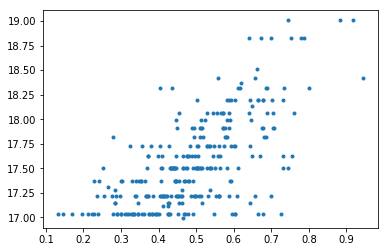

In [69]:
plt.plot(df.IPOP, log(df.valore), '.')